In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.set_index(df['CustomerID'])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,,
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
...,...,...,...,...,...
196,196,Female,35,120,79
197,197,Female,45,126,28
198,198,Male,32,126,74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
scaler = MinMaxScaler()

columns_to_scale = ['Age','Annual Income (k$)','Spending Score (1-100)']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df)

     CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male  0.019231            0.000000                0.387755
1             2    Male  0.057692            0.000000                0.816327
2             3  Female  0.038462            0.008197                0.051020
3             4  Female  0.096154            0.008197                0.775510
4             5  Female  0.250000            0.016393                0.397959
..          ...     ...       ...                 ...                     ...
195         196  Female  0.326923            0.860656                0.795918
196         197  Female  0.519231            0.909836                0.275510
197         198    Male  0.269231            0.909836                0.744898
198         199    Male  0.269231            1.000000                0.173469
199         200    Male  0.230769            1.000000                0.836735

[200 rows x 5 columns]


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.400962,0.373443,0.502041
std,57.879185,0.268635,0.215285,0.263505
min,1.000000,0.000000,0.000000,0.000000
25%,50.750000,0.206731,0.217213,0.344388
50%,100.500000,0.346154,0.381148,0.500000
75%,150.250000,0.596154,0.516393,0.734694
max,200.000000,1.000000,1.000000,1.000000


Gender
Female    112
Male       88
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

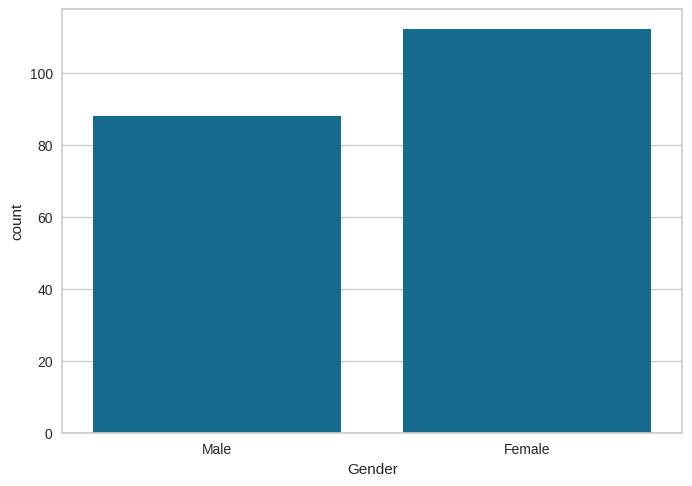

In [ ]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df)

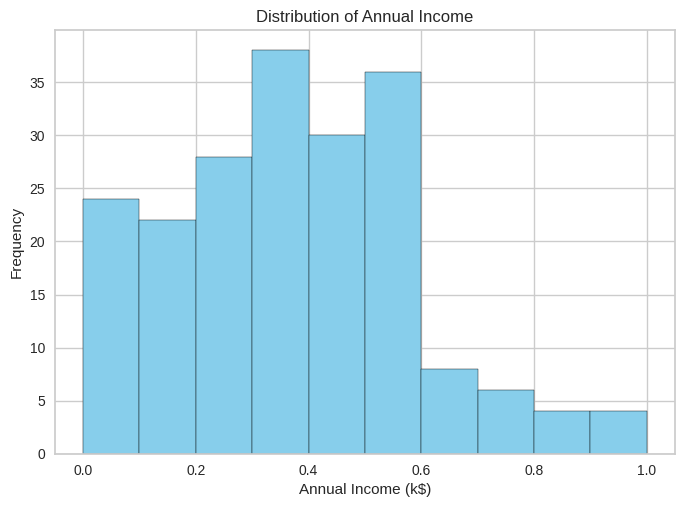

In [ ]:
plt.hist(df['Annual Income (k$)'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
plt.show()

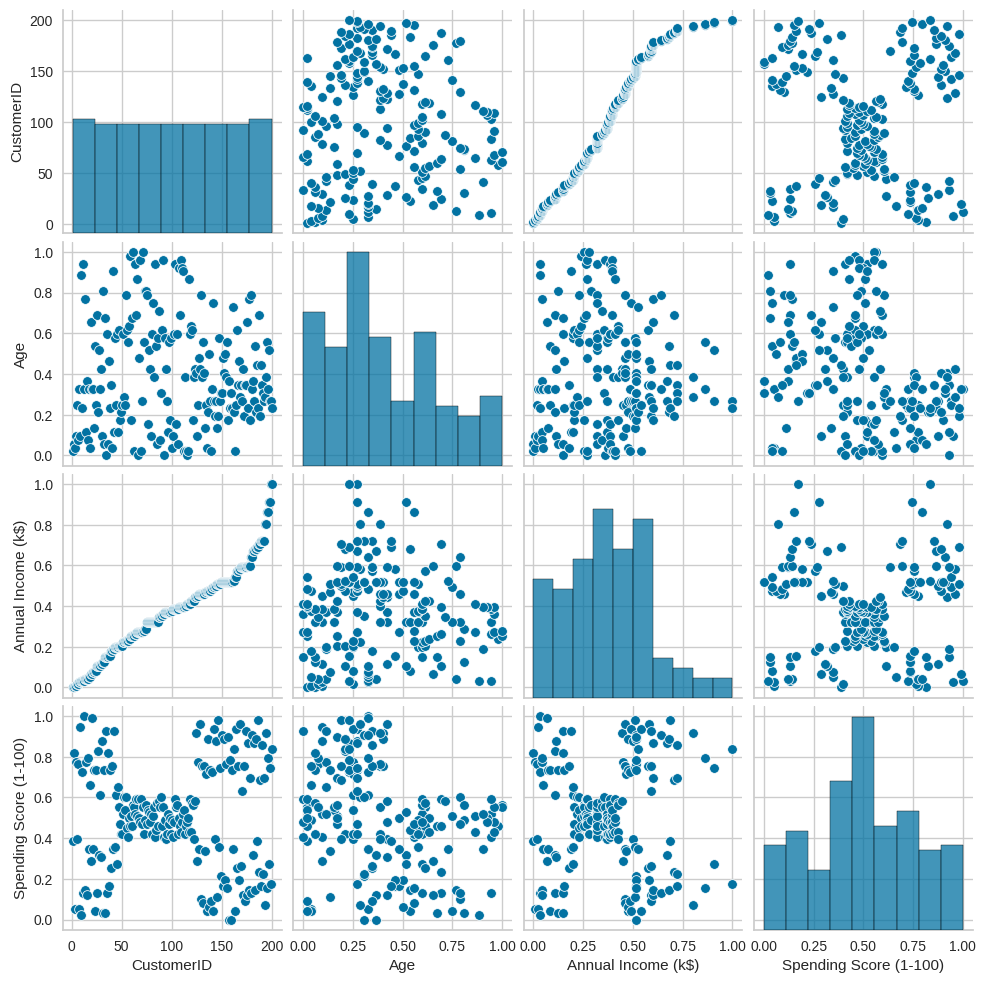

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

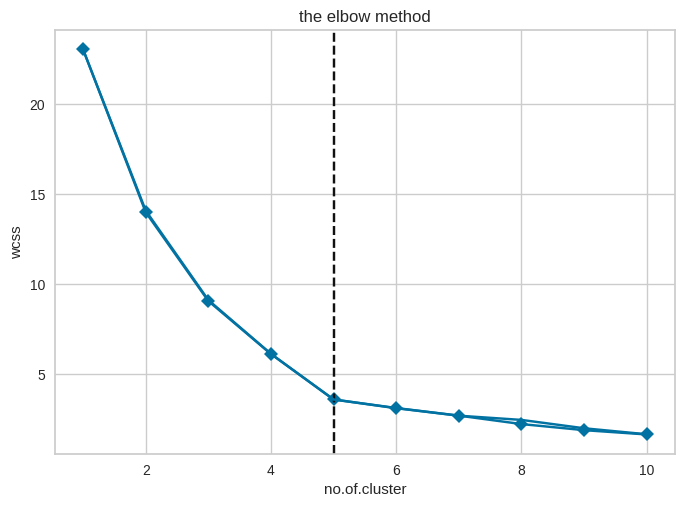

In [ ]:
# By the pairplot, we can infer that the clustering can be made based on the Spending score with respect to 'Annual Income' or with respect to the 'Age'. But in this specific case, we know that the accurate independent variable to be considered would be 'Annual Income'

x = df.drop(['Gender','CustomerID','Age'],axis = 1)
visualizer = KElbowVisualizer(KMeans(), k=(1, 11), metric='distortion', timings=False)
visualizer.fit(x)
optimal_k = visualizer.elbow_value_

#using yellobricks.cluster to find the optimal K value in the elbow method

wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init='k-means++',max_iter=300,n_init=1,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("the elbow method")
plt.xlabel("no.of.cluster")
plt.ylabel("wcss")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


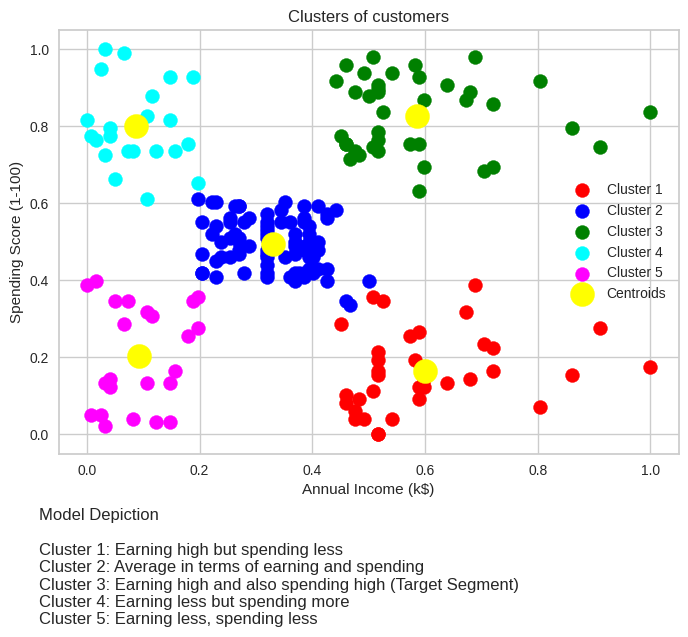

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Add text below the plot
plt.text(0.1, -0.2, 'Model Depiction\n\nCluster 1: Earning high but spending less\nCluster 2: Average in terms of earning and spending\nCluster 3: Earning high and also spending high (Target Segment)\nCluster 4: Earning less but spending more\nCluster 5: Earning less, spending less', fontsize=12, transform=plt.gcf().transFigure)

plt.show()
